In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
data=pd.read_csv("bank.csv")

In [88]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [90]:
data.groupby(["job"]).count()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
job,,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [91]:
data.groupby(["marital"]).count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
marital,,,,,,,,,,,,,,,,
divorced,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207
married,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214
single,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790


In [92]:
data.groupby(["education"]).count()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
education,,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


In [93]:
data.groupby(["contact"]).count()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
contact,,,,,,,,,,,,,,,,
cellular,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285,29285
telephone,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906,2906
unknown,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020


In [94]:
data.groupby(["poutcome"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
poutcome,,,,,,,,,,,,,,,,
failure,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901
other,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840
success,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511
unknown,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959


In [95]:
data.groupby(["deposit"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
deposit,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [96]:
data_plot=data[["age","balance","day","duration","campaign","pdays","previous","deposit"]]

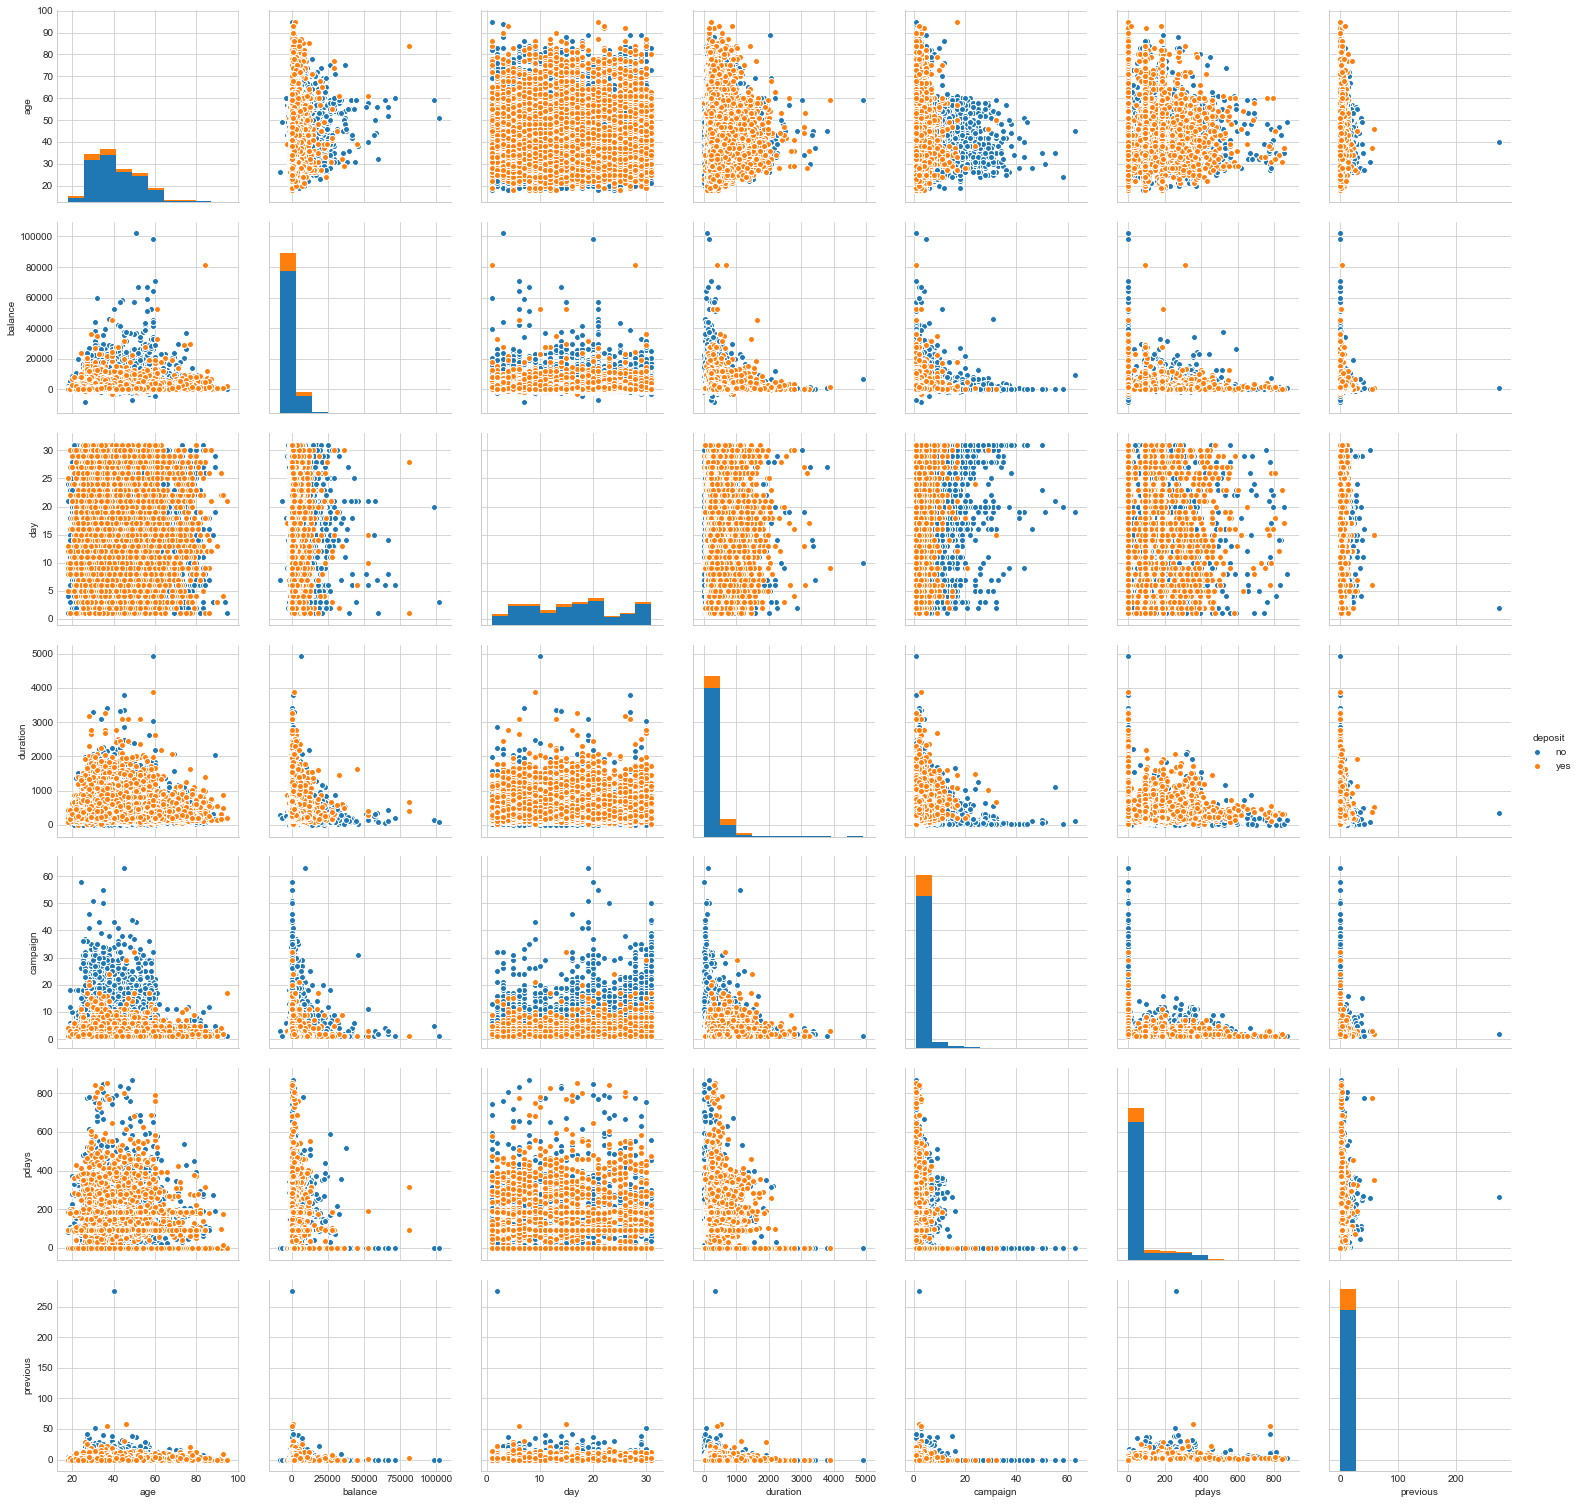

In [97]:
#contunious veriler için görselleştirme 
sns.set_style("whitegrid");
sns.pairplot(data_plot, hue="deposit", size=3);
plt.show()

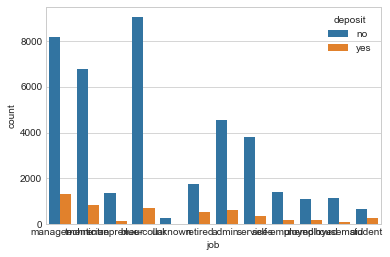

In [98]:
#kategorik veriler için görselleştirme
sns.countplot(x="job", hue='deposit', data=data)

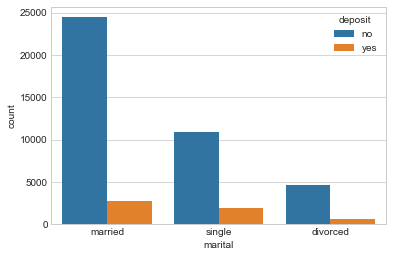

In [99]:
sns.countplot(x="marital", hue='deposit', data=data)

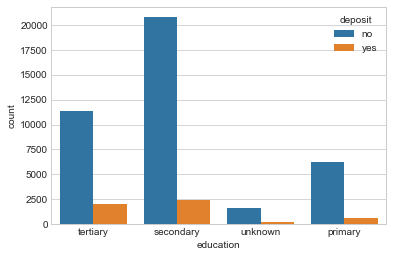

In [100]:
sns.countplot(x="education", hue='deposit', data=data)

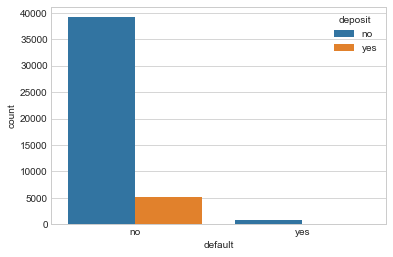

In [101]:
sns.countplot(x="default", hue='deposit', data=data)

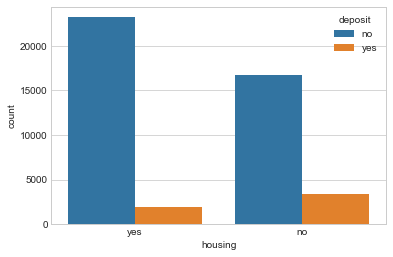

In [102]:
sns.countplot(x="housing", hue='deposit', data=data)

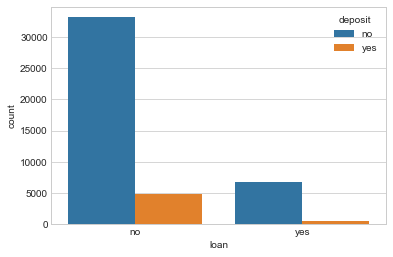

In [103]:
sns.countplot(x="loan", hue='deposit', data=data)

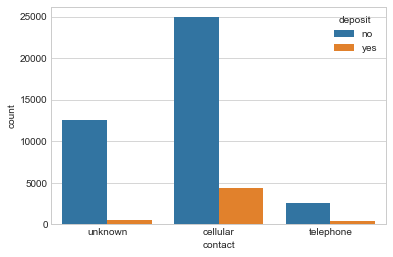

In [104]:
sns.countplot(x="contact", hue='deposit', data=data)

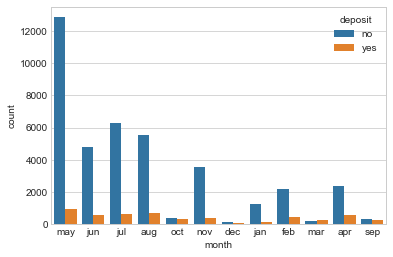

In [105]:
sns.countplot(x="month", hue='deposit', data=data)

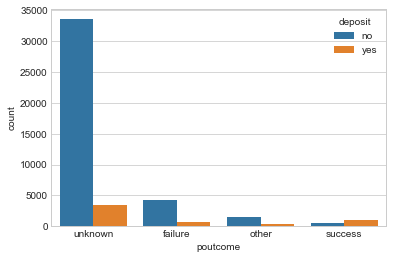

In [106]:
sns.countplot(x="poutcome", hue='deposit', data=data)

In [107]:
marital_mapping = {'divorced':2,'married':1, 'single' : 0} #ordinal veri oldukları için sıralamaya göre mapping işlemi yapıldı
data['marital'] = data['marital'].map(marital_mapping)

In [108]:
education_mapping = {"unknown":0,'primary':1, 'secondary' : 2, "tertiary":3} #ordinal veri oldukları için sıralamaya göre mapping işlemi yapıldı
data['education'] = data['education'].map(education_mapping)

In [109]:
month_mapping = {"jan":1,'feb':2, 'mar' : 3, "apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
data['month'] = data['month'].map(month_mapping)#ordinal veri oldukları için sıralamaya göre mapping işlemi yapıldı

In [110]:
job_mapping = {'unknown': 'unknown-job', 'admin':'admin',"blue-collar":"blue-collar","entrepreneur":"entrepreneur","housemaid":"housemaid","management":"management","retired":"retired","self-employed":"self-employed","services":"services","student":"student","technician":"technician","unemployed":"unemployed"}
data['job'] = data['job'].map(job_mapping) #unknown encoding işleminde çakıştığı için mapping yapıldı


In [111]:
contact_mapping = {'unknown': 'unknown-contact',"cellular contact":"cellular contact","telephone":"telephone"}
data['contact'] = data['contact'].map(contact_mapping) #unknown encoding işleminde çakıştığı için mapping yapıldı

In [112]:
poutcome_mapping = {'unknown': 'unknown-poutcome',"failure":"failure","other":"other","success":"success"}
data['poutcome'] = data['poutcome'].map(poutcome_mapping)#unknown encoding işleminde çakıştığı için mapping yapıldı

In [113]:
label=preprocessing.LabelEncoder()

In [114]:
#sadece yes ve no olduğu için label encoding ile no:0, yes:1 yapıldı
data["default"]=label.fit_transform(data["default"])
data["housing"]=label.fit_transform(data["housing"])
data["loan"]=label.fit_transform(data["loan"])
data["deposit"]=label.fit_transform(data["deposit"])

In [115]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,1,3,0,2143,1,0,unknown-contact,5,5,261,1,-1,0,unknown-poutcome,0
1,44,technician,0,2,0,29,1,0,unknown-contact,5,5,151,1,-1,0,unknown-poutcome,0
2,33,entrepreneur,1,2,0,2,1,1,unknown-contact,5,5,76,1,-1,0,unknown-poutcome,0
3,47,blue-collar,1,0,0,1506,1,0,unknown-contact,5,5,92,1,-1,0,unknown-poutcome,0
4,33,unknown-job,0,0,0,1,0,0,unknown-contact,5,5,198,1,-1,0,unknown-poutcome,0


In [116]:
one_hot = pd.get_dummies(data['job'])

data = data.drop('job',axis = 1)

data = data.join(one_hot)#aralarında bir ilişki olmadığı için one hot encoding yapıldı

In [117]:
one_hot = pd.get_dummies(data['contact'])

data = data.drop('contact',axis = 1)

data = data.join(one_hot)#aralarında bir ilişki olmadığı için one hot encoding yapıldı

In [118]:
one_hot = pd.get_dummies(data['poutcome'])

data = data.drop('poutcome',axis = 1)

data = data.join(one_hot)#aralarında bir ilişki olmadığı için one hot encoding yapıldı

In [119]:
data.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,student,technician,unemployed,unknown-job,telephone,unknown-contact,failure,other,success,unknown-poutcome
0,58,1,3,0,2143,1,0,5,5,261,...,0,0,0,0,0,1,0,0,0,1
1,44,0,2,0,29,1,0,5,5,151,...,0,1,0,0,0,1,0,0,0,1
2,33,1,2,0,2,1,1,5,5,76,...,0,0,0,0,0,1,0,0,0,1
3,47,1,0,0,1506,1,0,5,5,92,...,0,0,0,0,0,1,0,0,0,1
4,33,0,0,0,1,0,0,5,5,198,...,0,0,0,1,0,1,0,0,0,1


In [120]:
y=data.deposit

In [121]:
x=data.drop(["deposit"],axis=1)

In [122]:
#tree based algoritmalar kullanılacağı için scaling işlemi yapılmadı direkt train test ayırması yapıldı
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (36168, 30)
x test:  (9043, 30)
y train:  (36168,)
y test:  (9043,)


In [123]:
def model(model):
    model.fit(x_train,y_train) #modelin fit edilmesi
    pred=model.predict(x_test) #tahminlerin alınması
    print("train score",model.score(x_train,y_train) ) #eğitim skoru
    print("test score" , model.score(x_test,y_test)) #test skoru
    print(classification_report(y_test,pred)) #sınıflandırma raporunun elde edilmesi test ve tahmin sonuçlarına göre

In [124]:
decision=DecisionTreeClassifier(max_depth=25 , random_state=0) #max depth ilk olarak 25 seçilmiştir.
 

In [125]:
decision=DecisionTreeClassifier(max_depth=15 , random_state=0) #overfitting olduğu için max depth değeri düşürüldü
model(decision)

train score 0.9694481309444813
test score 0.8858785801172178
             precision    recall  f1-score   support

          0       0.93      0.94      0.94      7980
          1       0.52      0.49      0.50      1063

avg / total       0.88      0.89      0.88      9043



In [126]:
decision=DecisionTreeClassifier(max_depth=10 , random_state=0) #tekrardan mak depth değeri düşürüldü fakat class 1deki sonuç değişmedi
model(decision)

train score 0.9262331342623313
test score 0.8966051089240297
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      7980
          1       0.58      0.44      0.50      1063

avg / total       0.89      0.90      0.89      9043



In [127]:
random = RandomForestClassifier(random_state=0, n_estimators=15,max_depth=10)#parametreler ağac sayısı ve max_depth seçildi
model(random)

train score 0.9200121654501217
test score 0.8974897710936636
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      7980
          1       0.65      0.27      0.39      1063

avg / total       0.88      0.90      0.88      9043



In [128]:
random = RandomForestClassifier(random_state=0, n_estimators=5,max_depth=10)
model(random)

train score 0.9143994691439947
test score 0.8949463673559659
             precision    recall  f1-score   support

          0       0.91      0.98      0.94      7980
          1       0.63      0.25      0.36      1063

avg / total       0.88      0.89      0.87      9043



In [129]:
random = RandomForestClassifier(random_state=0, n_estimators=15,max_depth=15)#yapılan değişikliklere rağmen 1 classı hala düşük
model(random)

train score 0.9594945808449458
test score 0.8979321021784806
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      7980
          1       0.61      0.35      0.45      1063

avg / total       0.88      0.90      0.89      9043



In [130]:
grad=GradientBoostingClassifier(max_depth=4, learning_rate=0.1 ,random_state=0) #max_depth ve learning rate seçildi
model(grad)

train score 0.91821499668215
test score 0.9001437576025655
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      7980
          1       0.61      0.42      0.50      1063

avg / total       0.89      0.90      0.89      9043



In [131]:
grad=GradientBoostingClassifier(max_depth=4, learning_rate=1 ,random_state=0) #bunda da değişen bir şey olmadı class 1 hala düşük
model(grad)

train score 0.9479650519796505
test score 0.8941722879575362
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      7980
          1       0.56      0.48      0.52      1063

avg / total       0.89      0.89      0.89      9043



In [132]:
#bu yüzden class 1deki veri sayısı artırıldı
data_majority = data[data["deposit"]==0]
data_minority = data[data["deposit"]==1]
 

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     #değiştirme yöntemi ile veri artırımı
                                 n_samples=25000,    #daha çok olan sınıfa göre veri ayarlanıyor
                                 #eşit değerde veri olursa çok fazla benzer veri olacağı için veri sayısı daha az tutuldu
                                 random_state=150) 
 

data = pd.concat([data_majority, data_minority_upsampled])
data["deposit"].value_counts()

0    39922
1    25000
Name: deposit, dtype: int64

In [133]:
y=data.deposit
x=data.drop(["deposit"],axis=1)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (51937, 30)
x test:  (12985, 30)
y train:  (51937,)
y test:  (12985,)


In [135]:
decision=DecisionTreeClassifier(max_depth=25 , random_state=0)#yine aynı parametre seçildi
model(decision)

train score 0.9949361726707358
test score 0.9462456680785521
             precision    recall  f1-score   support

          0       0.99      0.92      0.95      7906
          1       0.89      0.99      0.93      5079

avg / total       0.95      0.95      0.95     12985



In [136]:
decision=DecisionTreeClassifier(max_depth=20 , random_state=0)
model(decision)

train score 0.9823054854920384
test score 0.9380824027724297
             precision    recall  f1-score   support

          0       0.98      0.91      0.95      7906
          1       0.88      0.98      0.93      5079

avg / total       0.94      0.94      0.94     12985



In [137]:
decision=DecisionTreeClassifier(max_depth=15 , random_state=0) #en iyi sonuç
model(decision)

train score 0.9482834973140536
test score 0.9175972275702734
             precision    recall  f1-score   support

          0       0.96      0.91      0.93      7906
          1       0.86      0.94      0.90      5079

avg / total       0.92      0.92      0.92     12985



In [138]:
random = RandomForestClassifier(random_state=0, n_estimators=15,max_depth=10) #aynı parametreler seçildi
model(random)

train score 0.8795271193946512
test score 0.8687716596072391
             precision    recall  f1-score   support

          0       0.89      0.89      0.89      7906
          1       0.83      0.83      0.83      5079

avg / total       0.87      0.87      0.87     12985



In [139]:
random = RandomForestClassifier(random_state=0, n_estimators=30,max_depth=10)
model(random)

train score 0.8774476769932803
test score 0.8674624566807855
             precision    recall  f1-score   support

          0       0.89      0.89      0.89      7906
          1       0.83      0.83      0.83      5079

avg / total       0.87      0.87      0.87     12985



In [140]:
random = RandomForestClassifier(random_state=0, n_estimators=30,max_depth=15)#aralarındaki en iyi sonuç
model(random)

train score 0.9460692762385198
test score 0.9186753946861763
             precision    recall  f1-score   support

          0       0.95      0.91      0.93      7906
          1       0.87      0.93      0.90      5079

avg / total       0.92      0.92      0.92     12985



In [141]:
random = RandomForestClassifier(random_state=0, n_estimators=30,max_depth=20)
model(random)

train score 0.9907772878679939
test score 0.951636503658067
             precision    recall  f1-score   support

          0       0.99      0.93      0.96      7906
          1       0.91      0.98      0.94      5079

avg / total       0.95      0.95      0.95     12985



In [142]:
grad=GradientBoostingClassifier(max_depth=3 ,learning_rate=0.1 ,random_state=0) #max-depth parametresi de ek olarak eklendi
model(grad)

train score 0.8584631380326164
test score 0.8619946091644205
             precision    recall  f1-score   support

          0       0.89      0.89      0.89      7906
          1       0.82      0.82      0.82      5079

avg / total       0.86      0.86      0.86     12985



In [143]:
grad=GradientBoostingClassifier(max_depth=4, learning_rate=1 ,random_state=0) #en iyi sonuç
model(grad)

train score 0.9258717292103895
test score 0.9051983057373892
             precision    recall  f1-score   support

          0       0.94      0.91      0.92      7906
          1       0.86      0.90      0.88      5079

avg / total       0.91      0.91      0.91     12985

